# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [14]:
# Load the data
data = pd.read_csv('air_quality_data_raw.csv')

print("Initial data overview:")
print(f"Shape of the dataset: {data.shape}")
print("\nFirst few rows of the dataset:")
print(data.head())

Initial data overview:
Shape of the dataset: (277822, 9)

First few rows of the dataset:
         date pm25 pm10   o3  no2                                     loc    aqi so2   co
0  2013-12-31        68    4    9           los-angeles-north main street  211.0       17
1  2013-12-31        22   31    6                   oyama,-niigata, japan   20.0   6     
2  2013-12-31        16   13   23  london-marylebone road, united kingdom   56.0   7    5
3  2013-12-31                   7      london-westminster, united kingdom    NaN         
4  2013-12-31            NaN    3             seindl,-dissay-weg, austria    NaN      NaN



Missing values count in each column:
date         0
pm25     10773
pm10     22909
o3       39901
no2      49088
loc          0
aqi       5435
so2      60125
co      107720
dtype: int64

Missing values percentage in each column:
date     0.000000
pm25     3.877663
pm10     8.245927
o3      14.362074
no2     17.668867
loc      0.000000
aqi      1.956289
so2     21.641555
co      38.773027
dtype: float64

After converting empty strings to NaN:
date         0
pm25     10773
pm10     22909
o3       39901
no2      49088
loc          0
aqi       5435
so2      60125
co      107720
dtype: int64


<ipython-input-15-915d4a27f313>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

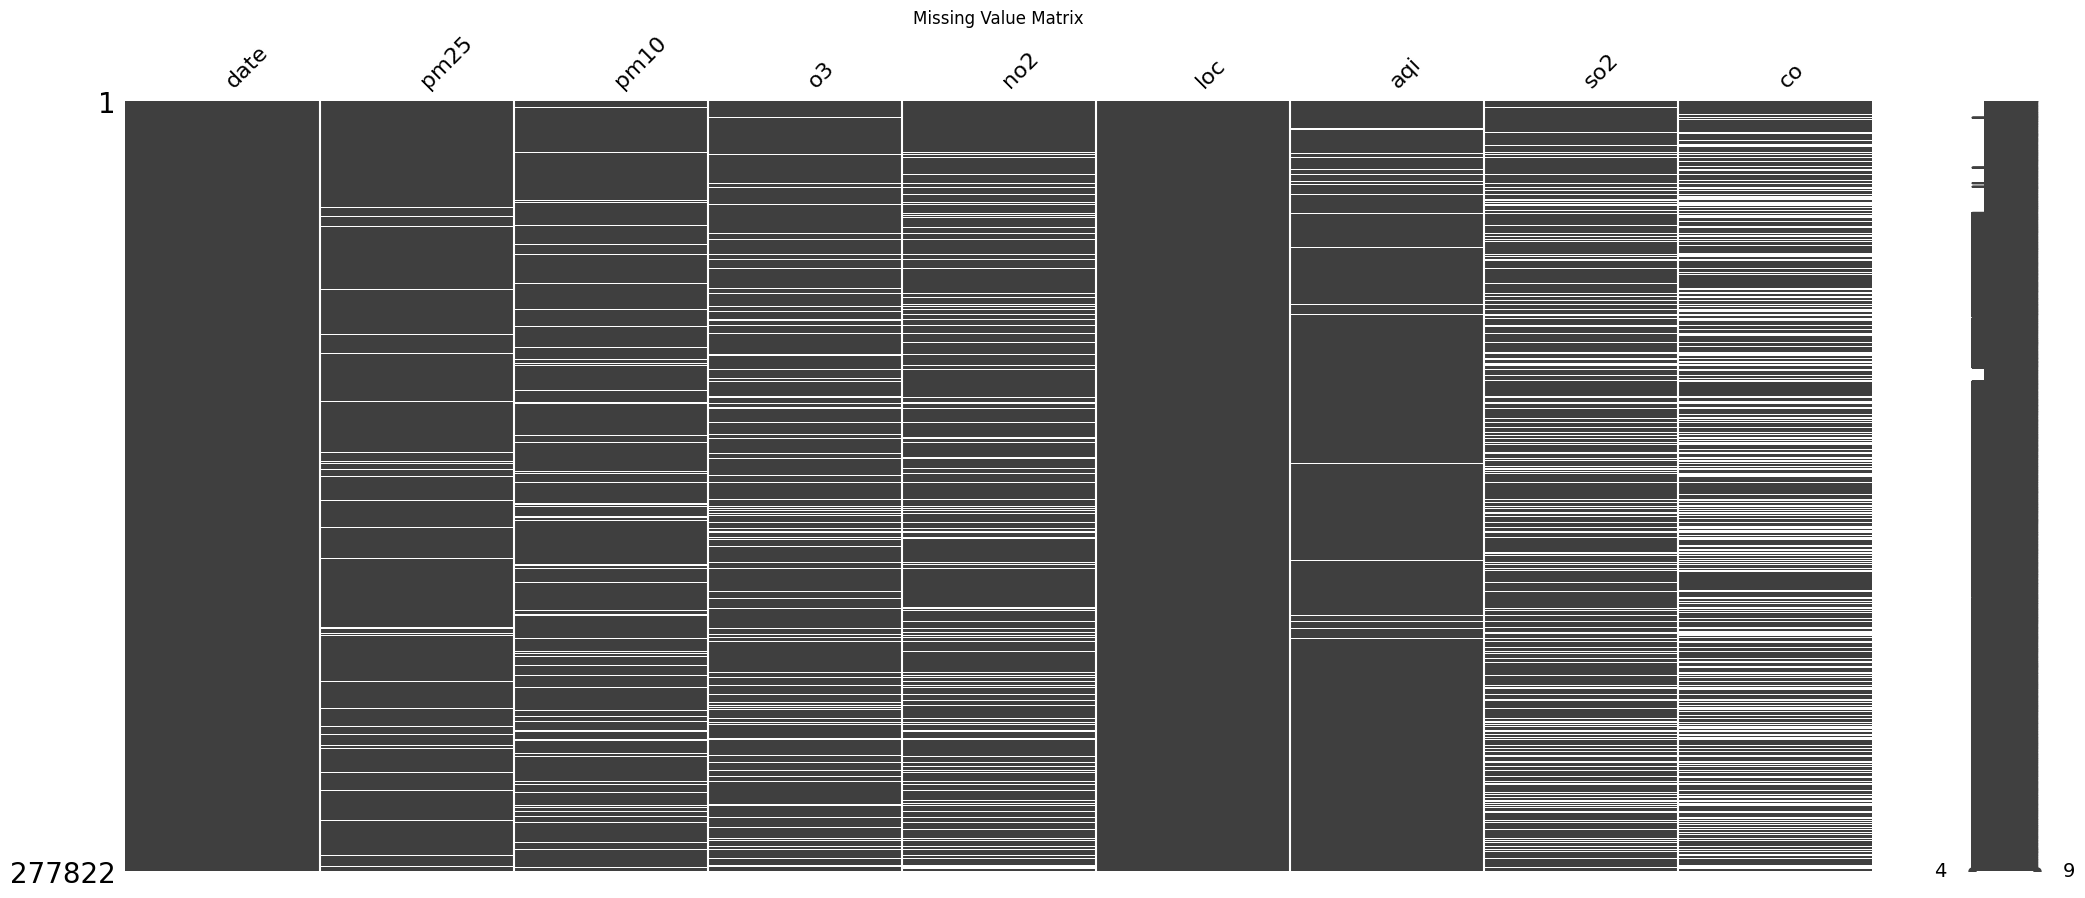

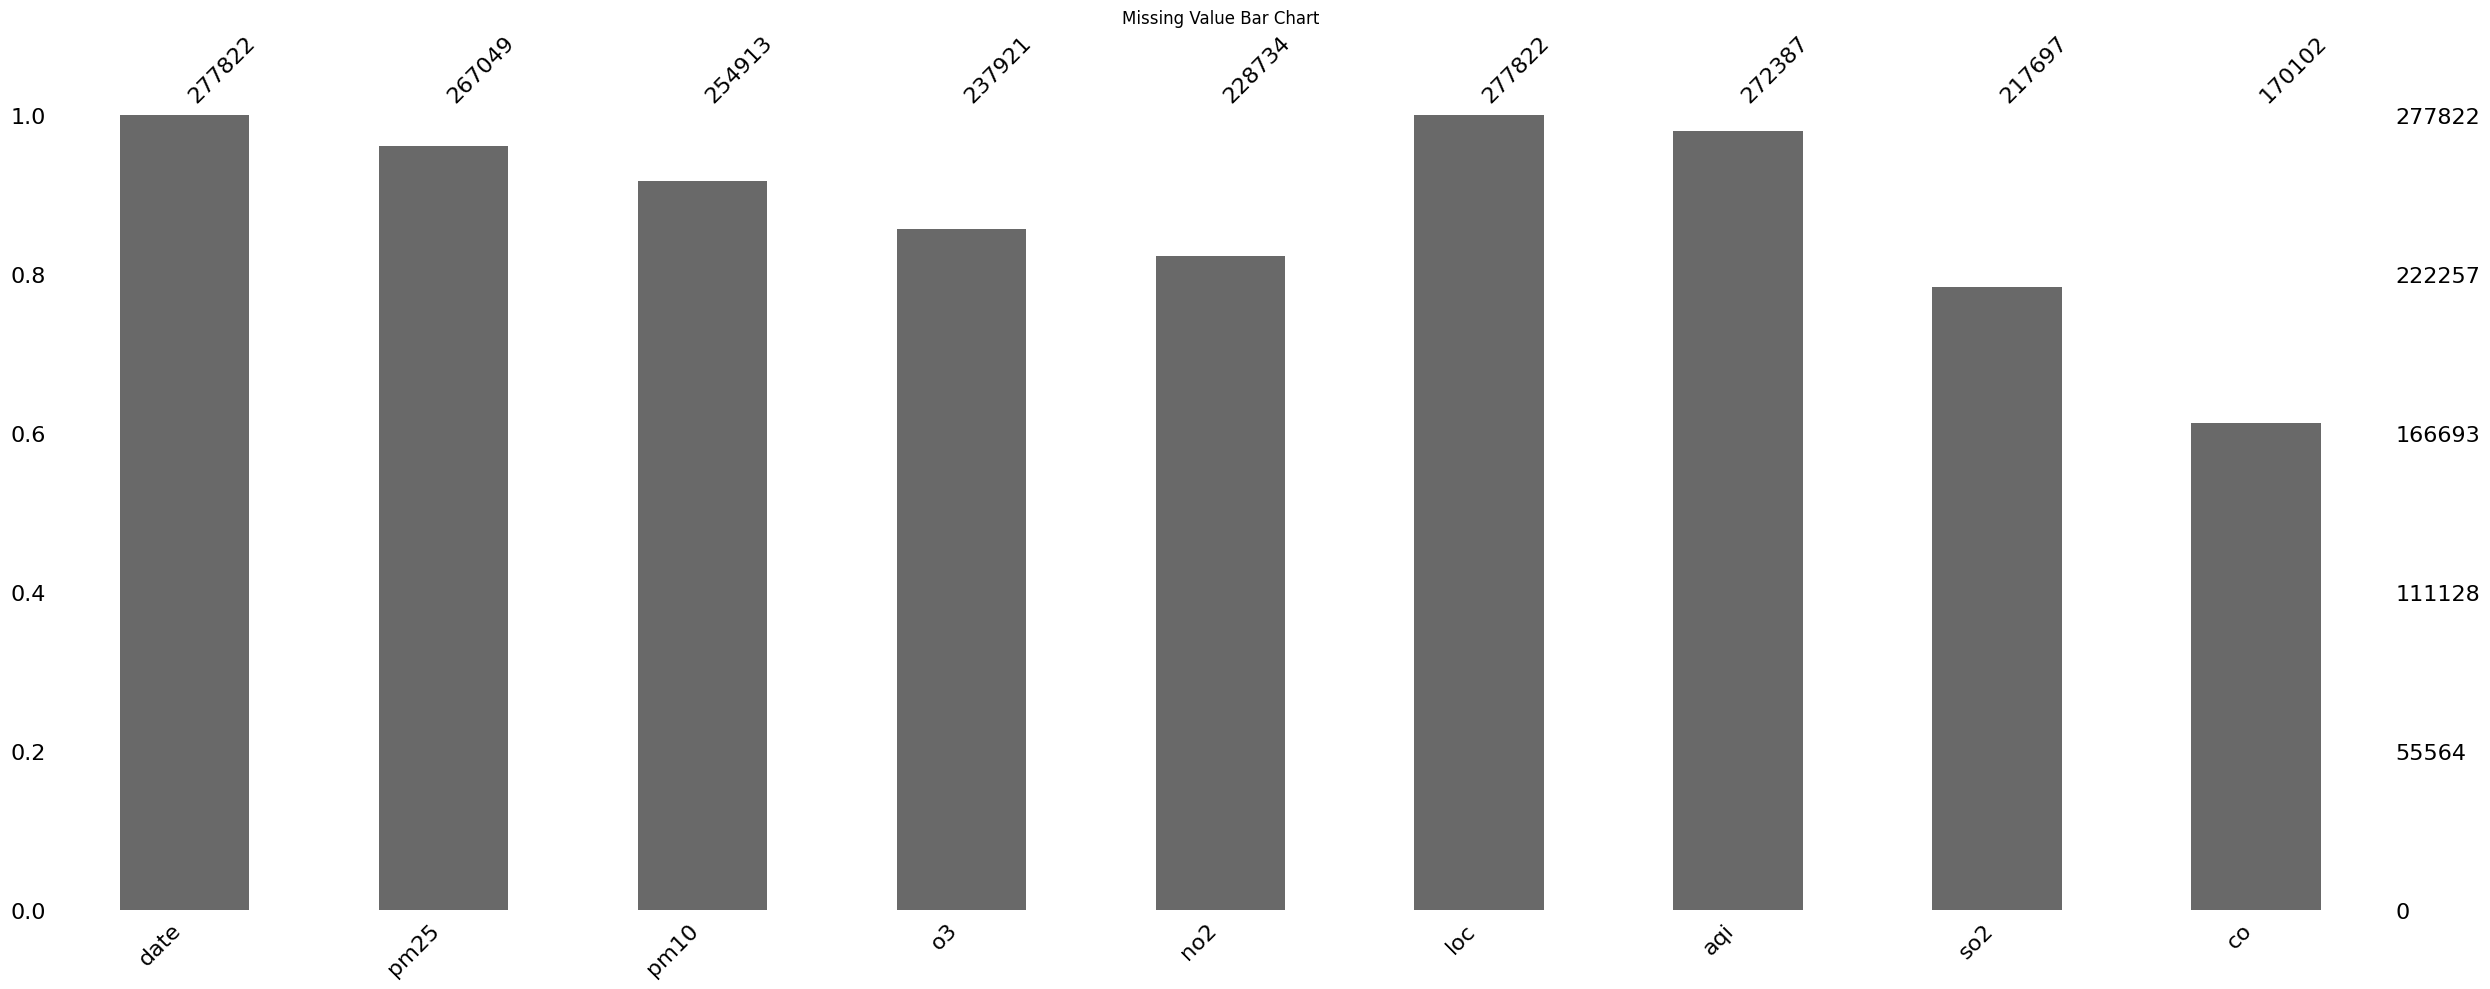

<Figure size 1200x800 with 0 Axes>

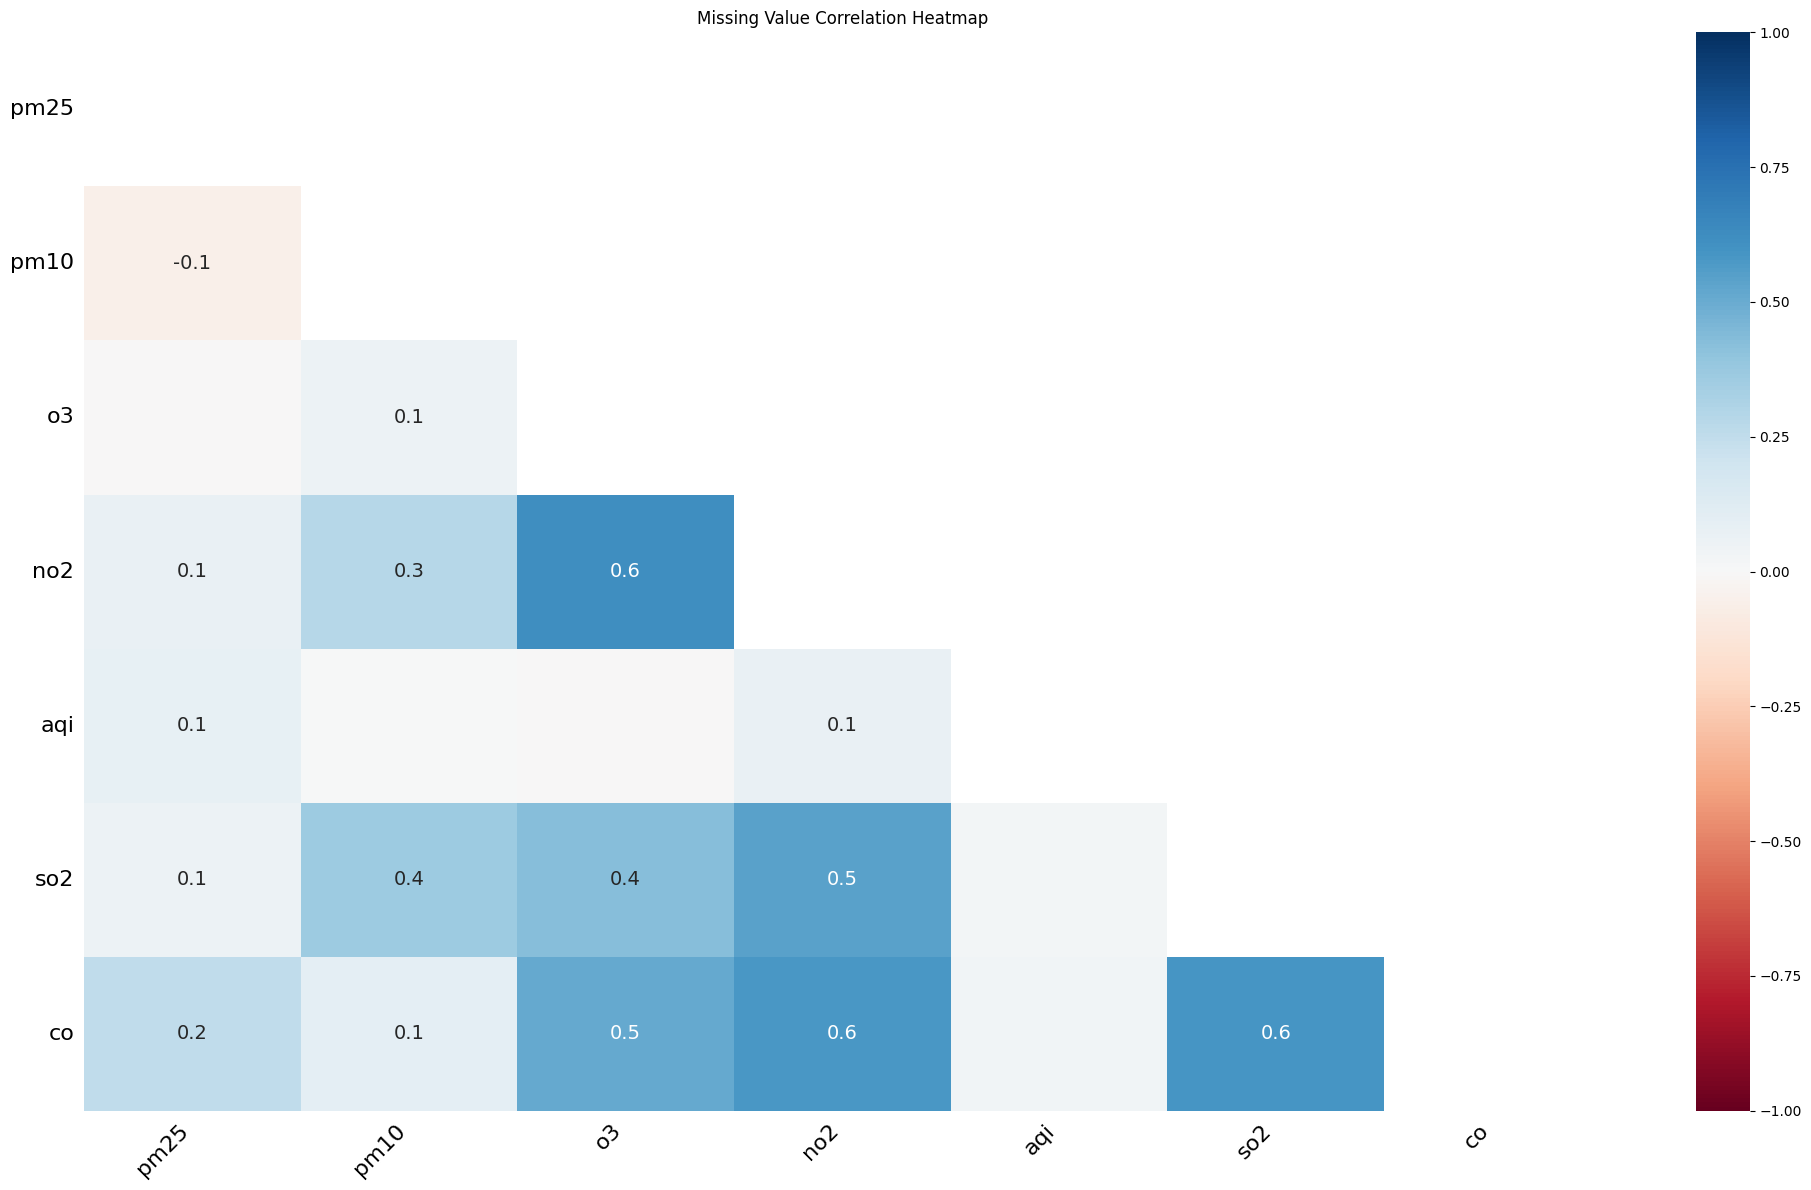


Data types before conversion:
date     object
pm25     object
pm10     object
o3       object
no2      object
loc      object
aqi     float64
so2      object
co       object
dtype: object

Data types after conversion:
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
loc             object
aqi            float64
so2            float64
co             float64
dtype: object

Basic statistics of numerical columns:
                                date           pm25           pm10             o3            no2            aqi            so2             co
count                         277822  222008.000000  227126.000000  190240.000000  198826.000000  272387.000000  118677.000000  110696.000000
mean   2020-02-08 11:39:27.855677184      53.902711      25.167506      28.742336       9.936920     227.486936       3.472021       5.530814
min              2013-12-31 00:00:00       1.000000       1.000000       1.000000       1.0000

In [15]:
# 1. Data Cleaning and Visualization of Missing Values
# -------------------------------------------------

# Check for missing values
print("\nMissing values count in each column:")
print(data.isnull().sum())
print("\nMissing values percentage in each column:")
print(data.isnull().mean() * 100)

# Check empty strings and convert them to NaN
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace('', np.nan)
        data[col] = data[col].str.strip() if not data[col].isna().all() else data[col]

print("\nAfter converting empty strings to NaN:")
print(data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(data)
plt.title('Missing Value Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(data)
plt.title('Missing Value Bar Chart')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
msno.heatmap(data)
plt.title('Missing Value Correlation Heatmap')
plt.tight_layout()
plt.show()

# Check data types
print("\nData types before conversion:")
print(data.dtypes)

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Convert numeric columns to appropriate types
numeric_cols = ['pm25', 'pm10', 'o3', 'no2', 'aqi', 'so2', 'co']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("\nData types after conversion:")
print(data.dtypes)

# Basic statistics of the numerical columns
print("\nBasic statistics of numerical columns:")
print(data.describe())

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [16]:
# Location counts
print("\nNumber of unique locations:")
print(data['loc'].nunique())
print("\nTop 10 locations by record count:")
print(data['loc'].value_counts().head(10))

# Time-based exploration
if 'date' in data.columns:
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day

    print("\nData points by year:")
    print(data['year'].value_counts().sort_index())

# Correlation analysis of pollutants
print("\nCorrelation matrix of pollutants:")
correlation = data[numeric_cols].corr()
print(correlation)


Number of unique locations:
79

Top 10 locations by record count:
loc
wanshou-temple, beijing             4138
central,-singapore                  4137
south,-singapore                    4137
east,-singapore                     4137
north,-singapore                    4137
changping-dingling, beijing         4137
west,-singapore                     4137
hainan-normal university, haikou    4135
hiroshima                           4135
los-angeles-north main street       4133
Name: count, dtype: int64

Data points by year:
year
2013       31
2014    15479
2015    20843
2016    22751
2017    22422
2018    23762
2019    25523
2020    27834
2021    27678
2022    27406
2023    27444
2024    27257
2025     9392
Name: count, dtype: int64

Correlation matrix of pollutants:
          pm25      pm10        o3       no2       aqi       so2        co
pm25  1.000000  0.719162  0.216767  0.330249  0.086685  0.335236  0.177713
pm10  0.719162  1.000000  0.163052  0.323770  0.072465  0.202238  0.14804


Number of unique locations:
79

Top 10 locations by record count:
loc
wanshou-temple, beijing             4138
central,-singapore                  4137
south,-singapore                    4137
east,-singapore                     4137
north,-singapore                    4137
changping-dingling, beijing         4137
west,-singapore                     4137
hainan-normal university, haikou    4135
hiroshima                           4135
los-angeles-north main street       4133
Name: count, dtype: int64

Top 10 countries in the dataset:
country
japan             31702
australia         22188
-singapore        20685
united kingdom    20188
germany           15630
usa               13385
-australia        11578
-germany          11485
beijing           11155
russia            10711
Name: count, dtype: int64

Data points by year:
year
2013       31
2014    15479
2015    20843
2016    22751
2017    22422
2018    23762
2019    25523
2020    27834
2021    27678
2022    27406
2023    27444
2024

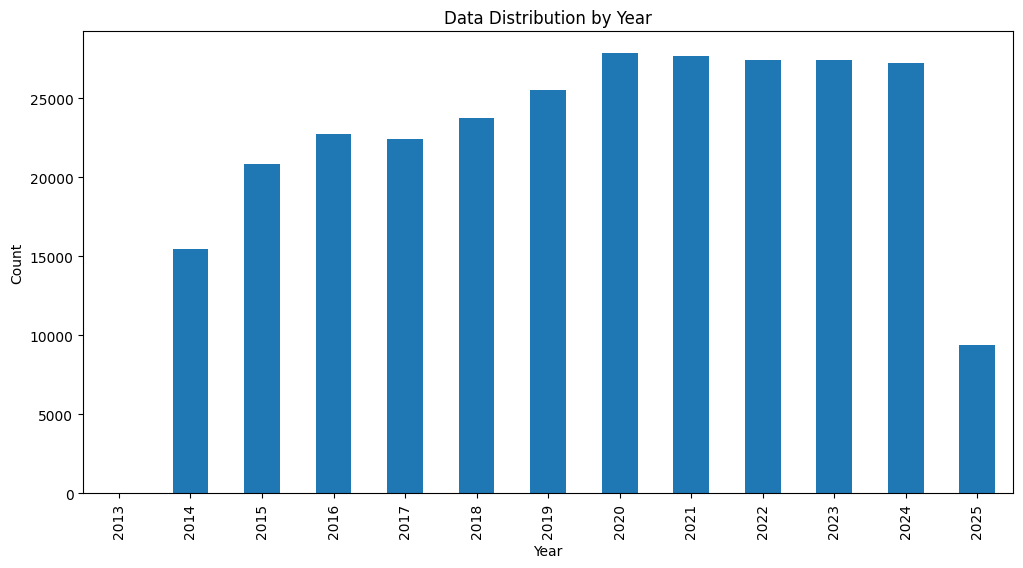

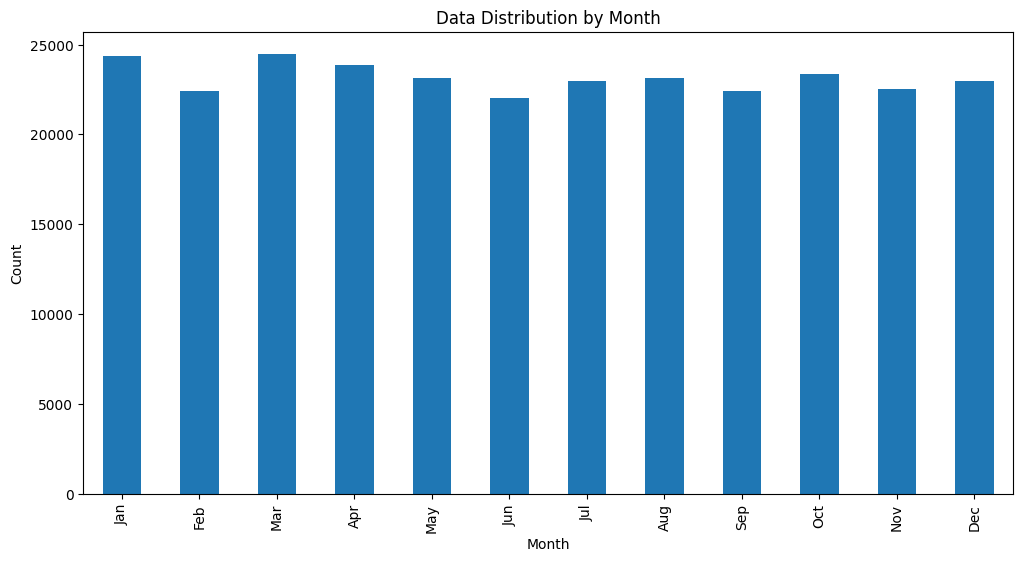


Correlation matrix of pollutants:
          pm25      pm10        o3       no2       aqi       so2        co
pm25  1.000000  0.719162  0.216767  0.330249  0.086685  0.335236  0.177713
pm10  0.719162  1.000000  0.163052  0.323770  0.072465  0.202238  0.148049
o3    0.216767  0.163052  1.000000 -0.124514  0.082478 -0.057467  0.059639
no2   0.330249  0.323770 -0.124514  1.000000 -0.107682  0.250258  0.053284
aqi   0.086685  0.072465  0.082478 -0.107682  1.000000 -0.602157 -0.016692
so2   0.335236  0.202238 -0.057467  0.250258 -0.602157  1.000000  0.235911
co    0.177713  0.148049  0.059639  0.053284 -0.016692  0.235911  1.000000


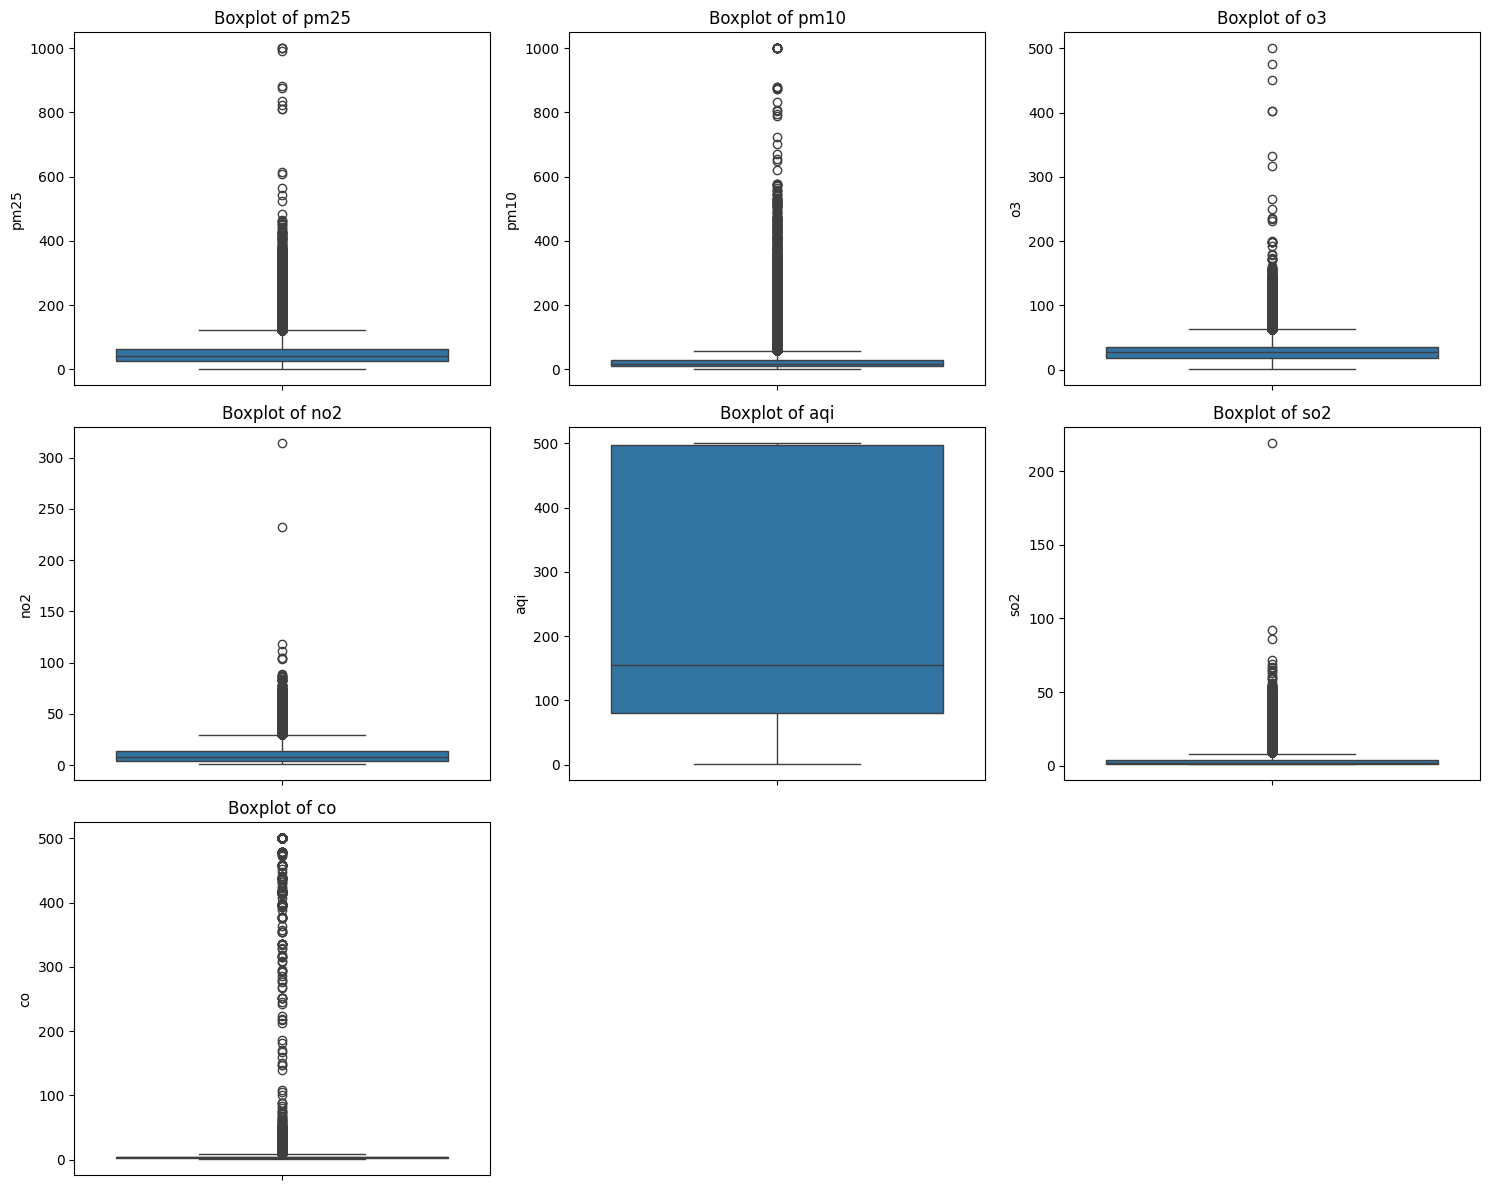

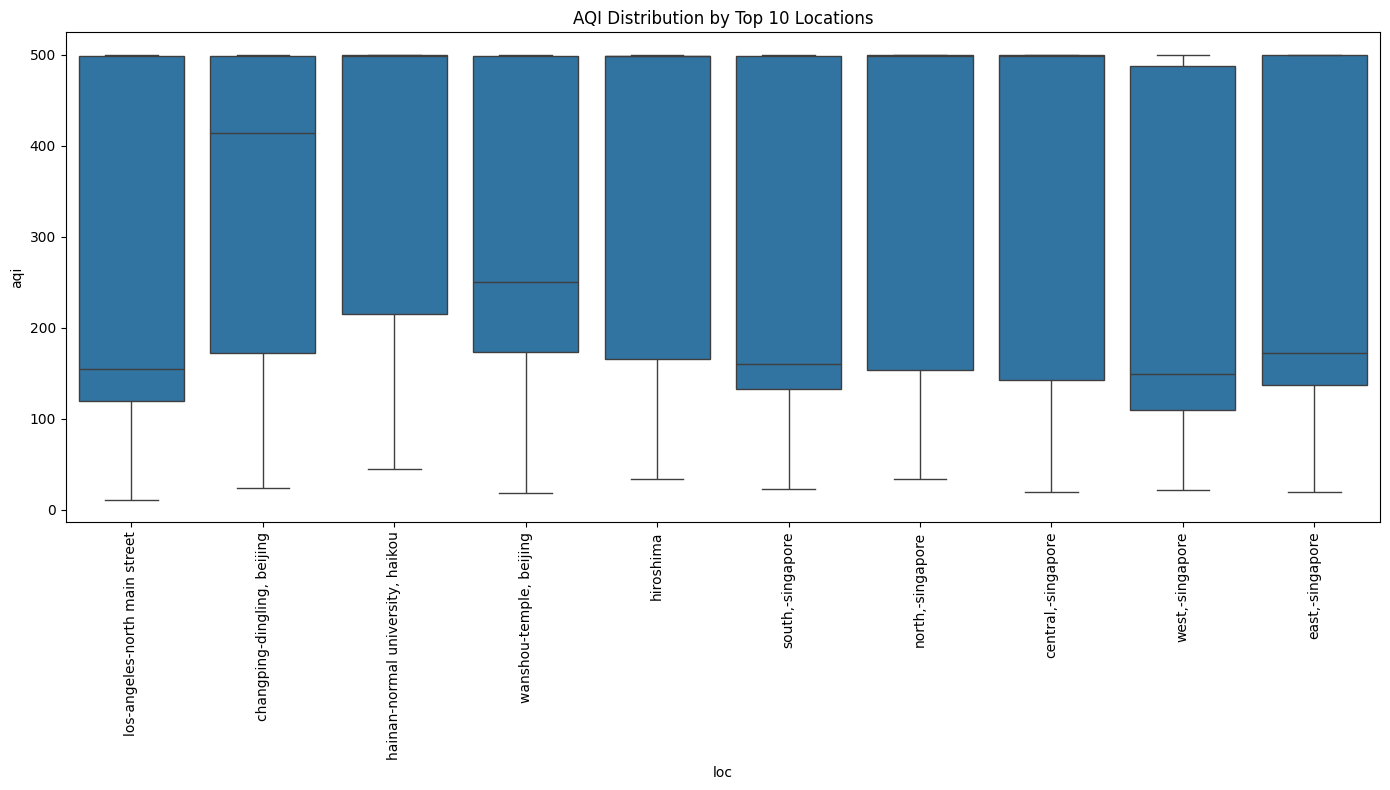

In [17]:
# 2. Data Exploration - Improved
# ---------------------------

# Location analysis
print("\nNumber of unique locations:")
print(data['loc'].nunique())
print("\nTop 10 locations by record count:")
print(data['loc'].value_counts().head(10))

# Extract country information for analysis
data['country'] = data['loc'].str.extract(r'(?:.*,\s*)(.*?)(?:$)')
print("\nTop 10 countries in the dataset:")
print(data['country'].value_counts().head(10))

# Time-based exploration
if 'date' in data.columns:
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day

    print("\nData points by year:")
    print(data['year'].value_counts().sort_index())

    plt.figure(figsize=(12, 6))
    data['year'].value_counts().sort_index().plot(kind='bar')
    plt.title('Data Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(12, 6))
    data['month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Data Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# Correlation analysis of pollutants
print("\nCorrelation matrix of pollutants:")
correlation = data[numeric_cols].corr()
print(correlation)

# Check for outliers in the dataset
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Display distribution of AQI by location (top 10 locations)
top_locations = data['loc'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='loc', y='aqi', data=data[data['loc'].isin(top_locations)])
plt.title('AQI Distribution by Top 10 Locations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

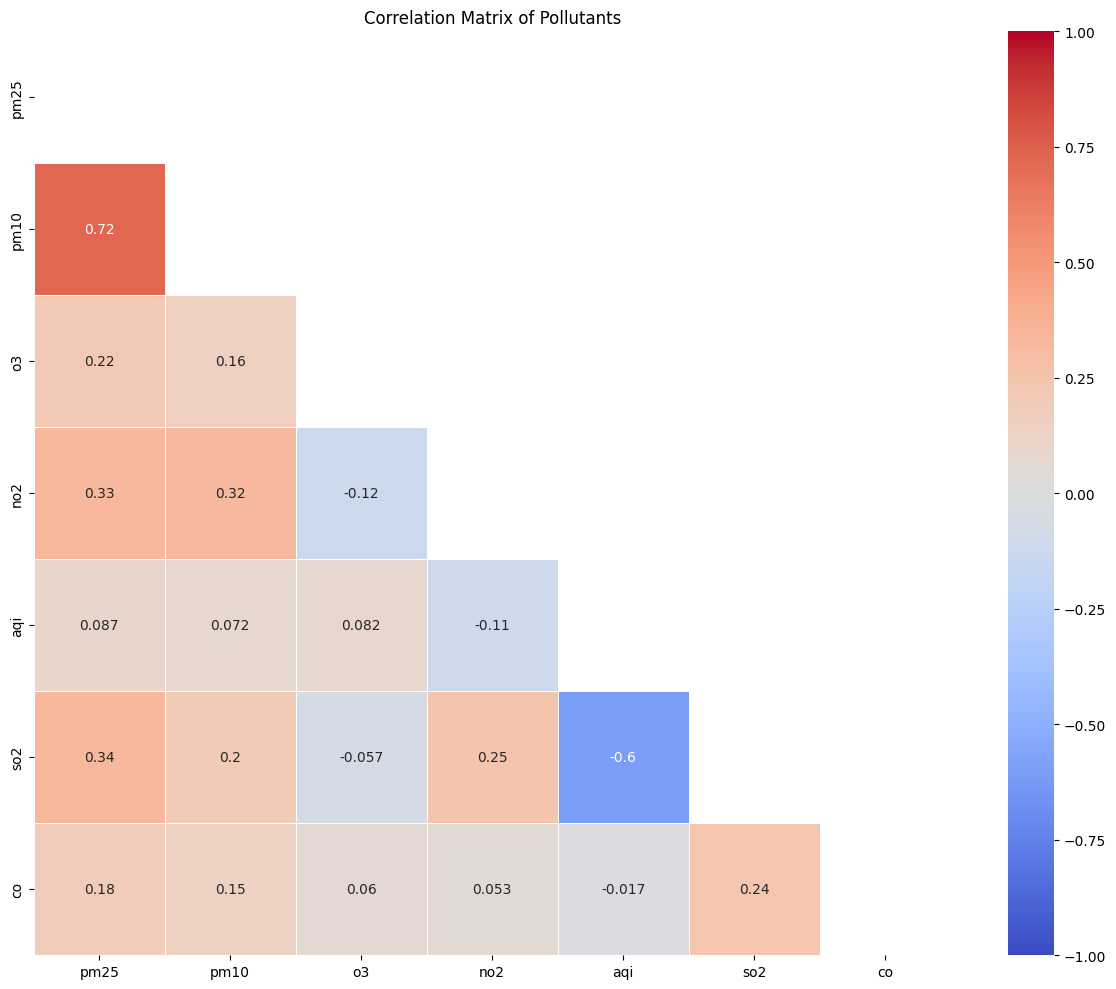

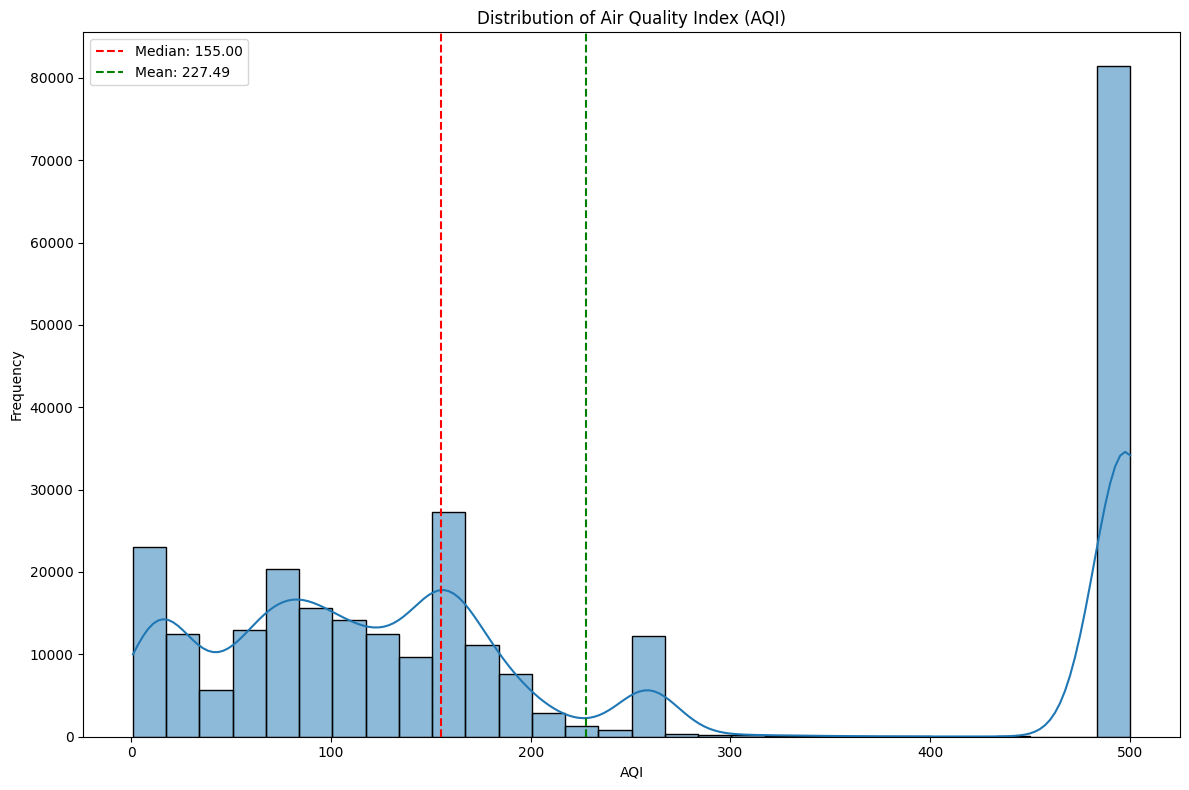

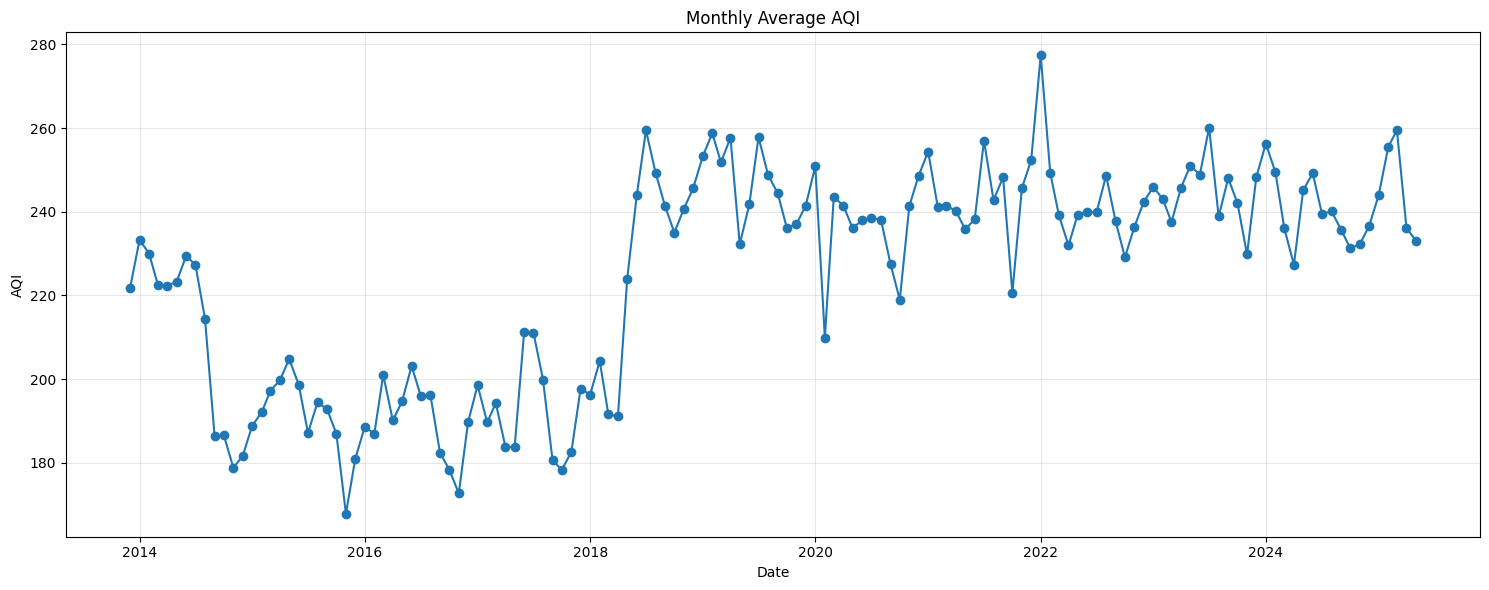

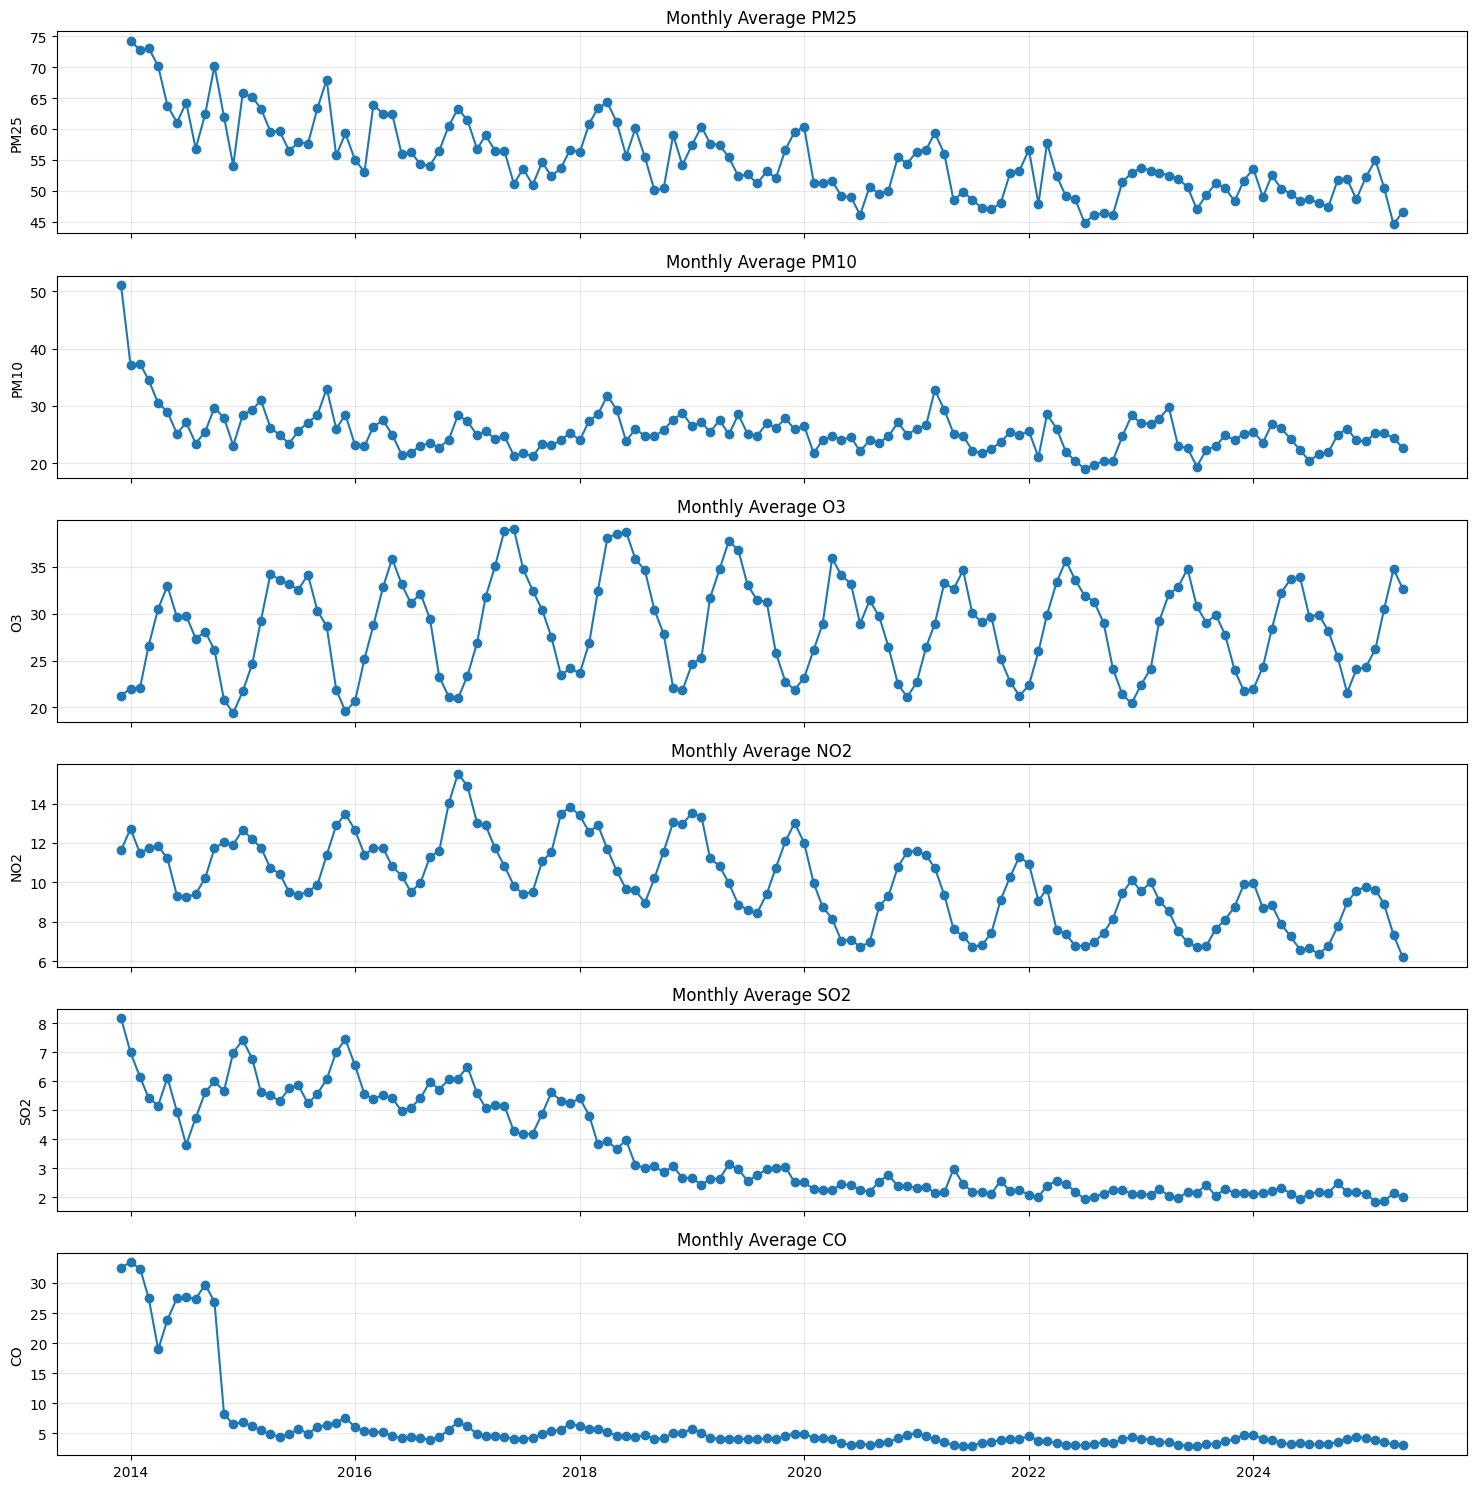

In [18]:
# 3. Data Visualization - Enhanced
# ------------------------------

# Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

# Distribution of AQI values with better visualization
plt.figure(figsize=(12, 8))
sns.histplot(data['aqi'].dropna(), kde=True, bins=30)
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.axvline(x=data['aqi'].median(), color='r', linestyle='--', label=f'Median: {data["aqi"].median():.2f}')
plt.axvline(x=data['aqi'].mean(), color='g', linestyle='--', label=f'Mean: {data["aqi"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Pollutant trends over time (monthly averages)
if len(data) > 100:  # Only if we have enough data
    # Create monthly averages
    data['yearmonth'] = data['date'].dt.to_period('M')
    monthly_avg = data.groupby('yearmonth')[numeric_cols].mean().reset_index()
    monthly_avg['yearmonth'] = monthly_avg['yearmonth'].dt.to_timestamp()

    # Plot AQI trend
    plt.figure(figsize=(15, 6))
    plt.plot(monthly_avg['yearmonth'], monthly_avg['aqi'], marker='o', linestyle='-')
    plt.title('Monthly Average AQI')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot all pollutants on separate subplots
    fig, axes = plt.subplots(len(numeric_cols)-1, 1, figsize=(15, 15), sharex=True)
    for i, col in enumerate([c for c in numeric_cols if c != 'aqi']):
        axes[i].plot(monthly_avg['yearmonth'], monthly_avg[col], marker='o', linestyle='-')
        axes[i].set_title(f'Monthly Average {col.upper()}')
        axes[i].set_ylabel(col.upper())
        axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

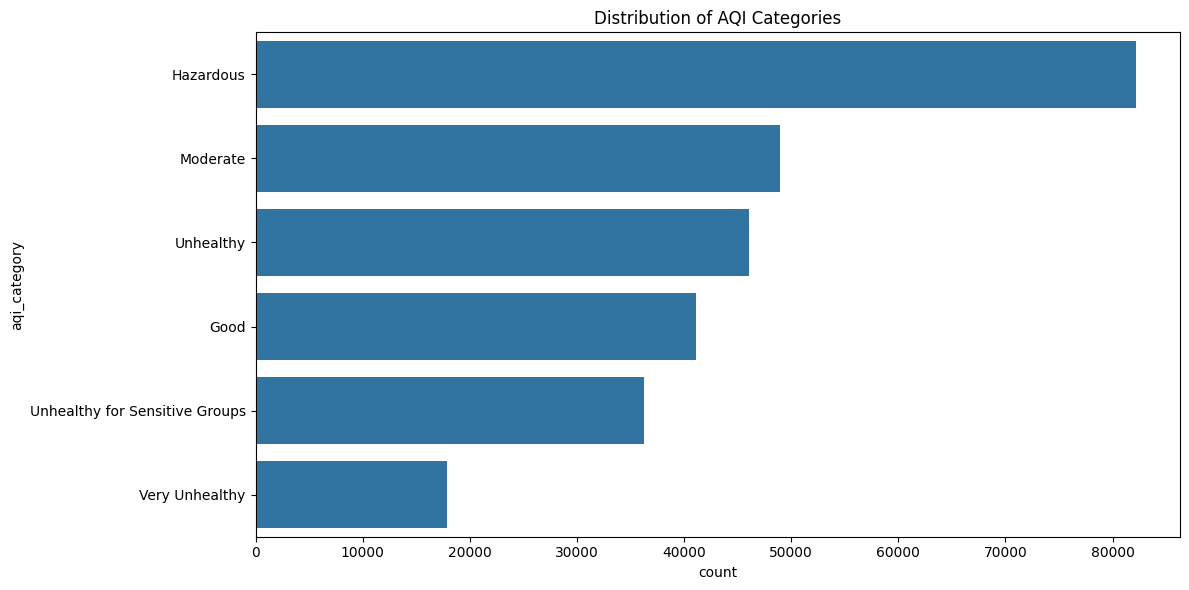

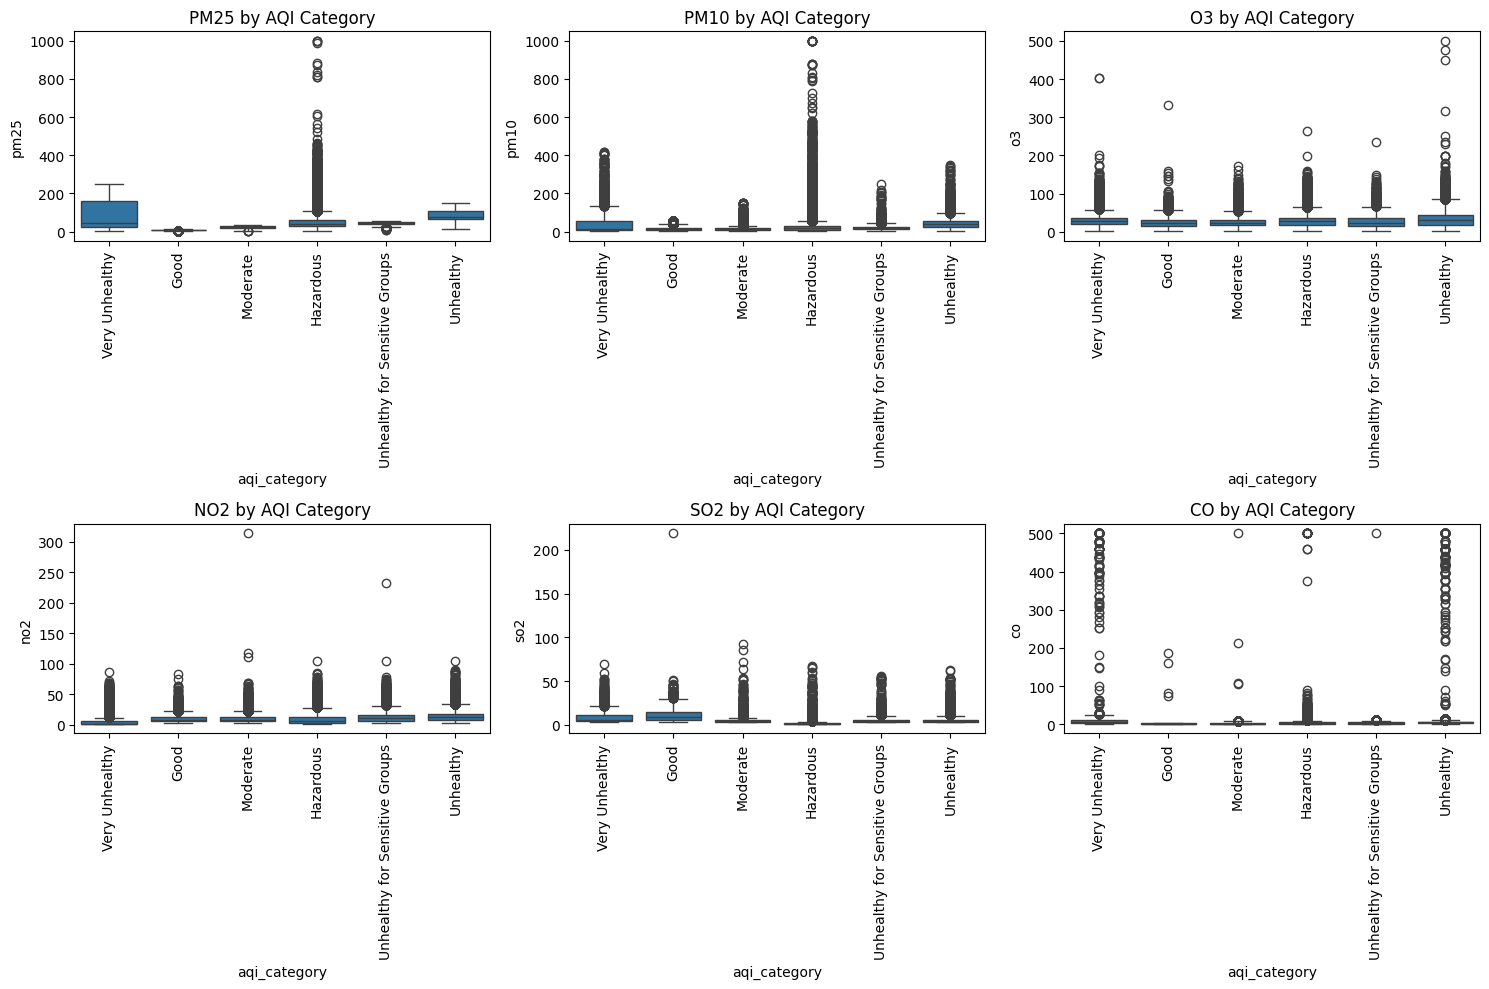

In [19]:
# 4. AQI Category Analysis
# -----------------------

# Define AQI categories based on standard ranges
def categorize_aqi(aqi):
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Add AQI category
data['aqi_category'] = data['aqi'].apply(categorize_aqi)

# Visualize AQI categories
plt.figure(figsize=(12, 6))
sns.countplot(y='aqi_category', data=data, order=data['aqi_category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.tight_layout()
plt.show()

# Check the relationship between different pollutants and AQI categories
plt.figure(figsize=(15, 10))
for i, col in enumerate([c for c in numeric_cols if c != 'aqi']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='aqi_category', y=col, data=data)
    plt.title(f'{col.upper()} by AQI Category')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [28]:
def imputation_strategy(df):
    """Handle missing values and standardize country and AQI category fields."""

    df_imputed = df.copy()

    # Ensure numeric types for pollutants
    numeric_cols = ['pm25', 'pm10', 'o3', 'no2', 'aqi', 'so2', 'co']
    df_imputed[numeric_cols] = df_imputed[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # --- PM2.5 / PM10 ratio-based imputation ---
    if df_imputed['pm25'].notna().sum() > 0 and df_imputed['pm10'].notna().sum() > 0:
        pm_ratio = df_imputed['pm25'].median() / df_imputed['pm10'].median()
        mask_pm25 = df_imputed['pm25'].isna() & df_imputed['pm10'].notna()
        df_imputed.loc[mask_pm25, 'pm25'] = df_imputed.loc[mask_pm25, 'pm10'] * pm_ratio

        mask_pm10 = df_imputed['pm10'].isna() & df_imputed['pm25'].notna()
        df_imputed.loc[mask_pm10, 'pm10'] = df_imputed.loc[mask_pm10, 'pm25'] / pm_ratio

    # --- AQI bin-based imputation ---
    aqi_bins = [0, 50, 100, 150, 200, 300, 500]
    df_imputed['aqi_bin'] = pd.cut(df_imputed['aqi'], bins=aqi_bins)

    for col in numeric_cols:
        if col == 'aqi':
            continue
        df_imputed[col] = df_imputed.groupby('aqi_bin')[col].transform(
            lambda x: x.fillna(x.median())
        )

    # --- Final fallback: global median ---
    for col in numeric_cols:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

    df_imputed.drop(columns=['aqi_bin'], inplace=True)

    # --- Extract country from loc ---
    def extract_country(loc):
        if pd.isna(loc):
            return "Unidentified"
        parts = [p.strip().lower() for p in loc.split(',')]
        if len(parts) >= 2:
            return parts[-1]
        return "Unidentified"  # Could not infer country

    df_imputed['country'] = df_imputed['loc'].apply(extract_country)

    # --- Fix AQI category ---
    def categorize_aqi(aqi_val):
        if pd.isna(aqi_val):
            return None
        if aqi_val <= 50:
            return 'Good'
        elif aqi_val <= 100:
            return 'Moderate'
        elif aqi_val <= 150:
            return 'Unhealthy for Sensitive Groups'
        elif aqi_val <= 200:
            return 'Unhealthy'
        elif aqi_val <= 300:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'

    df_imputed['aqi_category'] = df_imputed['aqi'].apply(categorize_aqi)

    return df_imputed

In [29]:
df_clean = imputation_strategy(data)

<ipython-input-28-4123ab154872>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_imputed[col] = df_imputed.groupby('aqi_bin')[col].transform(


In [30]:
df_clean.head()

,date,pm25,pm10,o3,no2,loc,aqi,so2,co,year,month,day,country,yearmonth,aqi_category
0,2013-12-31,162.444444,68.0,4.0,9.0,los-angeles-north main street,211.0,6.0,17.0,2013,12,31,Unidentified,2013-12,Very Unhealthy
1,2013-12-31,52.555556,22.0,31.0,6.0,"oyama,-niigata, japan",20.0,6.0,2.0,2013,12,31,japan,2013-12,Good
2,2013-12-31,38.222222,16.0,13.0,23.0,"london-marylebone road, united kingdom",56.0,7.0,5.0,2013,12,31,united kingdom,2013-12,Moderate
3,2013-12-31,42.000000,18.0,26.0,8.0,"london-westminster, united kingdom",155.0,4.0,3.0,2013,12,31,united kingdom,2013-12,Unhealthy
4,2013-12-31,42.000000,18.0,26.0,8.0,"seindl,-dissay-weg, austria",155.0,4.0,3.0,2013,12,31,austria,2013-12,Unhealthy


In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277822 entries, 0 to 277821
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          277822 non-null  datetime64[ns]
 1   pm25          277822 non-null  float64       
 2   pm10          277822 non-null  float64       
 3   o3            277822 non-null  float64       
 4   no2           277822 non-null  float64       
 5   loc           277822 non-null  object        
 6   aqi           277822 non-null  float64       
 7   so2           277822 non-null  float64       
 8   co            277822 non-null  float64       
 9   year          277822 non-null  int32         
 10  month         277822 non-null  int32         
 11  day           277822 non-null  int32         
 12  country       277822 non-null  object        
 13  yearmonth     277822 non-null  period[M]     
 14  aqi_category  277822 non-null  object        
dtypes: datetime64[ns]

In [32]:
df_clean.to_csv('air_quality_data_clean.csv', index=False)